In [21]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
sns.set(color_codes=True)

%matplotlib inline

# Helpers
from sklearn.cross_validation import train_test_split

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

# Accuracy
from sklearn.metrics import accuracy_score

In [22]:
# get cat-dog data csv files as a DataFrame
cat_dog_df = pd.read_csv("./sample_train.csv")

# preview the data
cat_dog_df.head()

,X,Y,new_label
0,-0.710816,0.367314,dog
1,-0.924908,-0.536105,cat
2,-0.630253,0.511709,dog
3,0.125574,-0.782793,dog
4,0.094225,-0.961415,cat


In [23]:
# data description and exploration
cat_dog_df.describe()
cat_dog_df.info()
cat_dog_df.dtypes
cat_dog_df.columns
cat_dog_df.index
cat_dog_df.shape            
cat_dog_df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
X            990 non-null float64
Y            990 non-null float64
new_label    990 non-null object
dtypes: float64(2), object(1)
memory usage: 23.3+ KB


array([[-0.710816113989, 0.36731414907, 'dog'],
       [-0.924908271988, -0.5361053306100001, 'cat'],
       [-0.630252671564, 0.51170858632, 'dog'],
       ..., 
       [-0.22721880422600002, 0.80543609363, 'cat'],
       [-0.787043574253, -0.0051749442469899995, 'dog'],
       [-0.026875187596900003, 0.619781355296, 'dog']], dtype=object)

In [24]:
# Descriptive statistics
cat_dog_df.mean()

X   -0.011315
Y    0.010373
dtype: float64

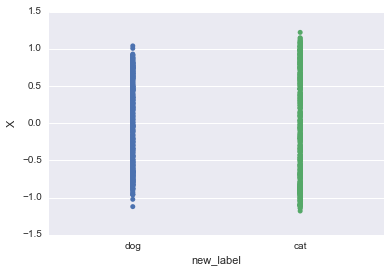

In [25]:
# Plot a strip plot for x w.r.t. label
# Should provide an understanding about distribution
sns.stripplot(x="new_label", y="X", data=cat_dog_df);

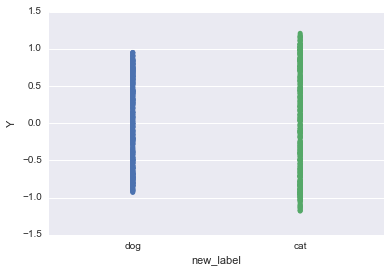

In [26]:
# Plot a strip plot for y w.r.t. label
sns.stripplot(x="new_label", y="Y", data=cat_dog_df);

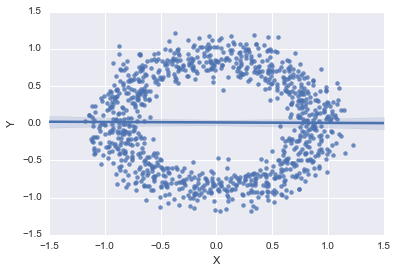

In [27]:
# Quite clear that these are not linearly separable using either x or y since for
# both the labels the values are pretty uniformly distributed [Almost too uniformly :)]
# Let's plot a reg-plot to confirm if any correlation between x and y values.

sns.regplot(x="X", y="Y", data=cat_dog_df);

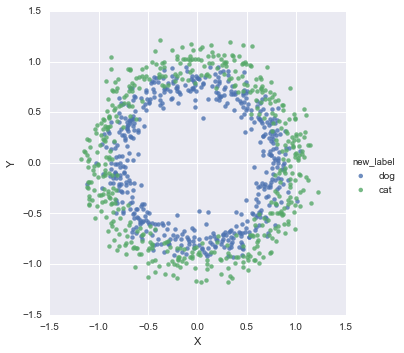

In [28]:
# Essentially flat line tells that the values of x and y are nearly independent and their is no correlation
# Plot a simple scatter plot of the data-set to get an overview of distribution in 2-D space
sns.lmplot('X', 'Y', 
           data=cat_dog_df, 
           fit_reg=False,
           hue='new_label')

# As confirmed by these plots it is quite clear that there is pretty uniform distribution
# Only insight from plotting seems to be that cat values span slightly more on the number scale for both x and y

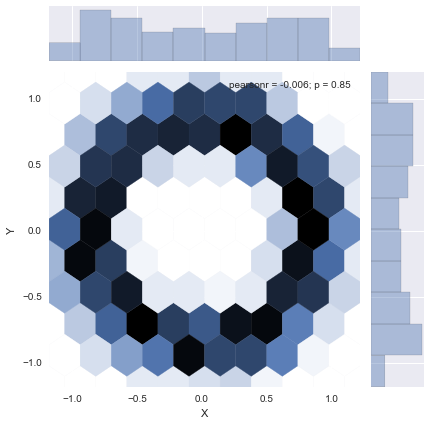

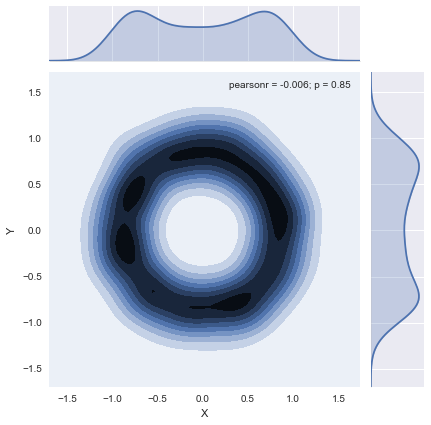

In [29]:
# Plotting a hex-bin plot to find most dense regions
sns.jointplot(x="X", y="Y", data=cat_dog_df, kind="hex")

# plotting a kde plot
sns.jointplot(x="X", y="Y", data=cat_dog_df, kind="kde")

In [30]:
# Based on the data distribution and the identical range of x,y values it is clear that no feature standardization required
# Split data into train and test
X = cat_dog_df.loc[:, ['X', 'Y']]
string_y = cat_dog_df['new_label']

# Encode Y values as integer to ease with boundary visualization
class_le = LabelEncoder()
Y = class_le.fit_transform(cat_dog_df['new_label'].values)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_combined = np.vstack((X_train, X_train))
Y_combined = np.hstack((Y_train, Y_test))

In [31]:
# Write a generic contour plot function to visualize the decision boudary with every model
def visualize_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'v')
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.6, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.contour(xx1, xx2, Z, cmap=plt.cm.Paired)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

Misclassified samples: 155
Accuracy: 0.48


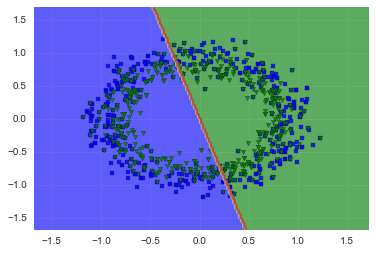

In [32]:
# Perceptron based classification 
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, Y_train)

Y_pred = ppn.predict(X_test)

ppn.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=ppn)

Misclassified samples: 149
Accuracy: 0.50


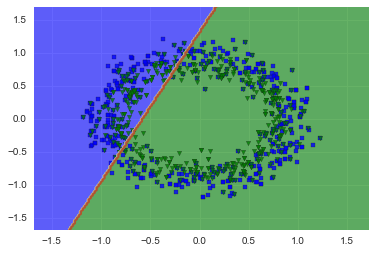

In [33]:
# Logistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=logreg)

Misclassified samples: 53
Accuracy: 0.82


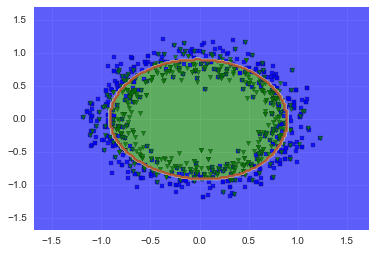

In [34]:
# Support Vector Machine

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=svc)

Misclassified samples: 53
Accuracy: 0.82


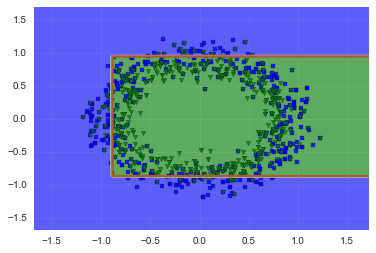

In [35]:
# Decision Tree

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

tree.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=tree)

Misclassified samples: 67
Accuracy: 0.77


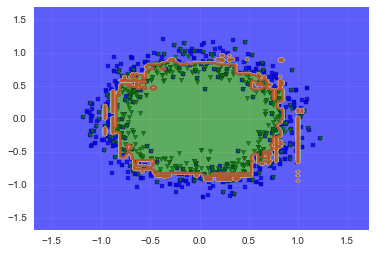

In [36]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=random_forest)

Misclassified samples: 63
Accuracy: 0.79


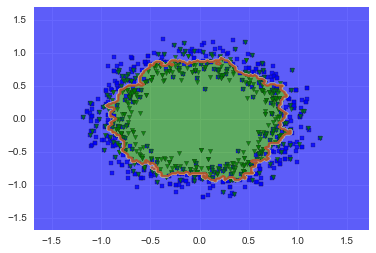

In [37]:
# k nearest neighbour

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=knn)

Misclassified samples: 59
Accuracy: 0.80


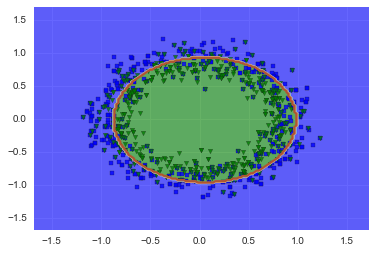

In [38]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_test, Y_test)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=gaussian)

Misclassified samples: 59
Accuracy: 0.80


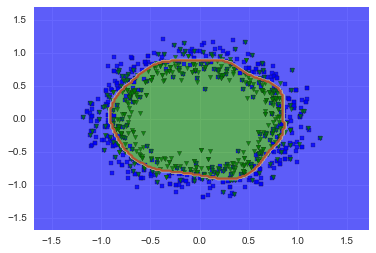

In [39]:
# Kernel SVM

svm = SVC(kernel='rbf', random_state=0, gamma=5, C=10.0)

svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)

svm.score(X_train, Y_train)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=svm)

Misclassified samples: 57
Accuracy: 0.81


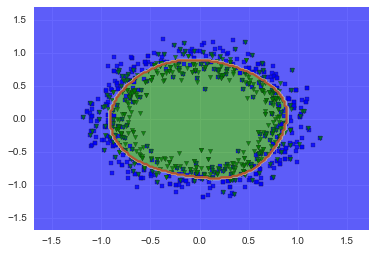

In [40]:
# Fine-tuning the parameters
svm = SVC(kernel='rbf', random_state=0, gamma=1.5, C=1.0)

svm.fit(X_train, Y_train)

Y_pred = svm.predict(X_test)

svm.score(X_train, Y_train)

print('Misclassified samples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

visualize_decision_boundary(X_combined, Y_combined, classifier=svm)